<a href="https://colab.research.google.com/github/buivanson47/Computer-Vision/blob/master/Bai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

512


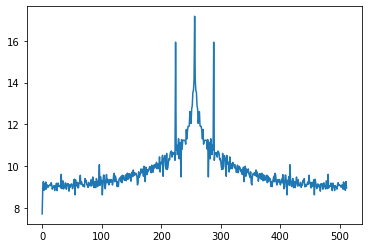

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


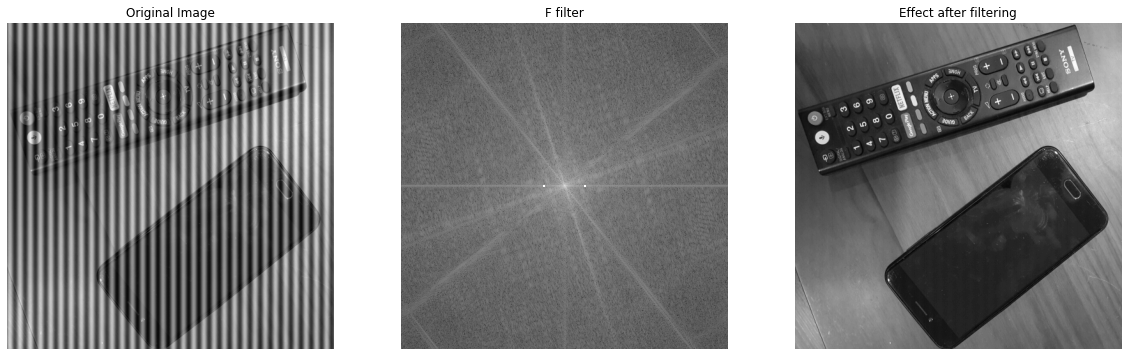

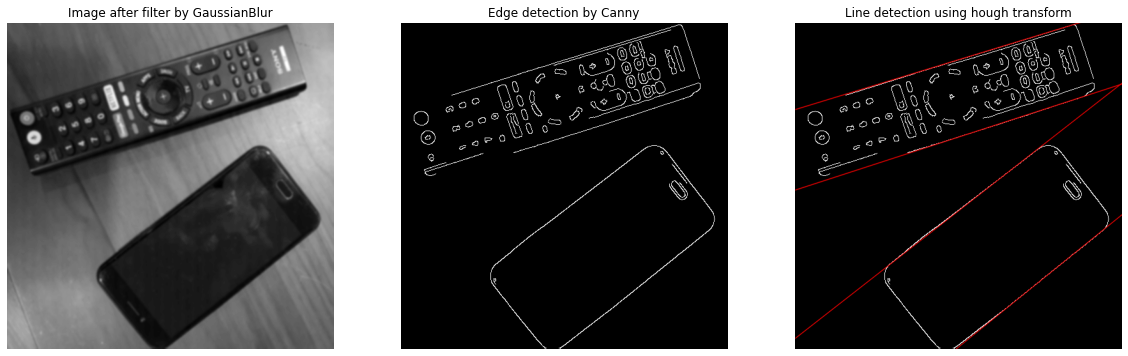

[1.2740903, 0.8901179, 1.2566371, 0.9075712]
Goc giua hai vat the la 21.00000058437824°


In [ ]:
import cv2
import sys
import math
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
def RemoveSinNoise(img):#Transfer parameters are Fourier transform spectrogram and filter size
    # calculate amplitude spectrum
    mag_spec = np.log(np.abs(img))
    h, w = mag_spec.shape[0:2]
    # img[int(h/2),224]=0
    # img[int(h/2),288]=0
    print(len(mag_spec))
    y=mag_spec[int(h/2)]
    plt.plot(y)
    plt.show()
    for i in range(len(y)-1):
      if y[i+1]/1.41 > y[i]:img[int(h/2),i+1]=0
    return img
def kmeanangle(arr):
    if len(arr) < 2 : print("Error")
    # Init clustering
    cluster1=[]
    cluster2=[]
    change = True
    for i in range(len(arr)) :
      if i%2==0:cluster1.append(arr[i])
      else: cluster2.append(arr[i])
    centroid1 = sum(cluster1)/len(cluster1)
    centroid2 = sum(cluster2)/len(cluster2)
    # Clustering
    while(change):
        change=False
        for i in cluster1:
          if abs(i-centroid1) >= abs(i-centroid2):
            cluster2.append(i)
            cluster1.remove(i)
            change=True
        for i in cluster2:
          if abs(i-centroid2) > abs(i-centroid1):
            cluster1.append(i)
            cluster2.remove(i)
            change=True
        centroid1 = sum(cluster1)/len(cluster1)
        centroid2 = sum(cluster2)/len(cluster2)   
    return centroid1, centroid2
      
gray = cv2.imread("img3_add.png",cv2.IMREAD_GRAYSCALE)
# gray = cv2.imread("img3_bruit.png",cv2.IMREAD_GRAYSCALE)
# gray = cv2.imread("img3_bruit2.png",cv2.IMREAD_GRAYSCALE)
# gray = cv2.imread("img4.png",cv2.IMREAD_GRAYSCALE)
# Fourier transform
img_dft = np.fft.fft2(gray)
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

#filterSinNoise
dft_shift=RemoveSinNoise(dft_shift)

# calculate amplitude spectrum
res = np.log(np.abs(dft_shift))

# Inverse Fourier Transform
idft_shift = np.fft.ifftshift(dft_shift)  #Move the frequency domain from the middle to the upper left corner
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)
# blurimg=cv2.GaussianBlur(gray, (3, 3), 0)
# cv2_imshow(blurimg)
# cv2_imshow(gray)
# cv2_imshow(np.uint8(ifimg))

blurimg=cv2.GaussianBlur(np.uint8(ifimg), (7, 7), 0)
# cv2_imshow(np.uint8(ifimg))
dst = cv2.Canny(blurimg, 30, 90)  
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst,cv2.COLOR_GRAY2RGB)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 160, None, 0, 0)
angle=[]
rh=[]
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        angle.append(theta)
        rh.append(rho)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)
# Draw 
plt.figure(figsize=(20,6))
plt.subplot(131), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(res, 'gray'), plt.title('F filter')
plt.axis('off')
plt.subplot(133), plt.imshow(np.uint8(ifimg), 'gray'), plt.title('Effect after filtering')
plt.axis('off')
plt.show() 
plt.figure(figsize=(20,6))
plt.subplot(131), plt.imshow(blurimg, 'gray'), plt.title('Image after filter by GaussianBlur')
plt.axis('off')
plt.subplot(132), plt.imshow(dst, 'gray'), plt.title('Edge detection by Canny')
plt.axis('off')
plt.subplot(133), plt.imshow(cdst, 'gray'), plt.title('Line detection using hough transform')
plt.axis('off')
plt.show()
# cv2_imshow(dst)
# cv2_imshow(cdst)

# Caculate angle

print(angle)
angle1,angle2 = kmeanangle(angle)
# print(angle1,angle2)
print("Goc giua hai vat the la "+ str(abs(angle1-angle2)/np.pi*180)+"°" )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


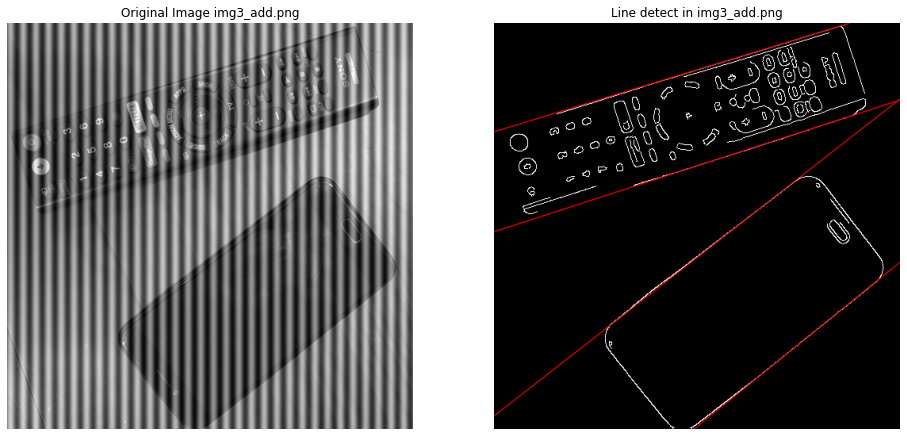

Goc giua hai vat the la 21.00000058437824°


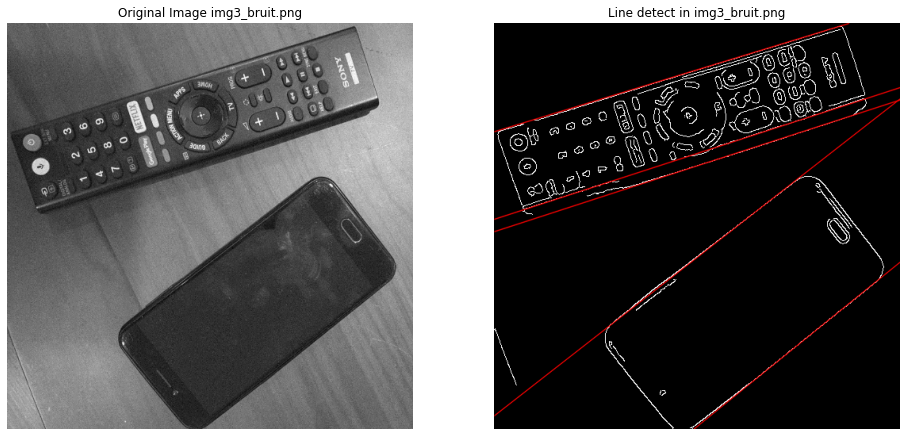

Goc giua hai vat the la 20.83333486171103°


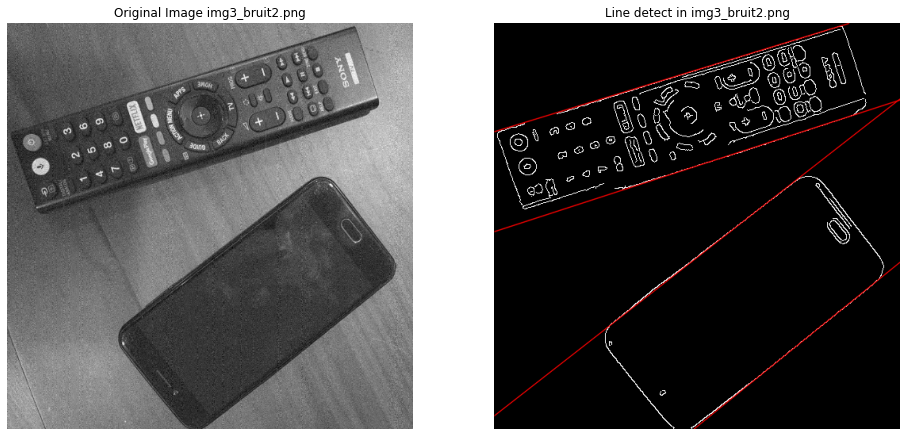

Goc giua hai vat the la 21.00000058437824°


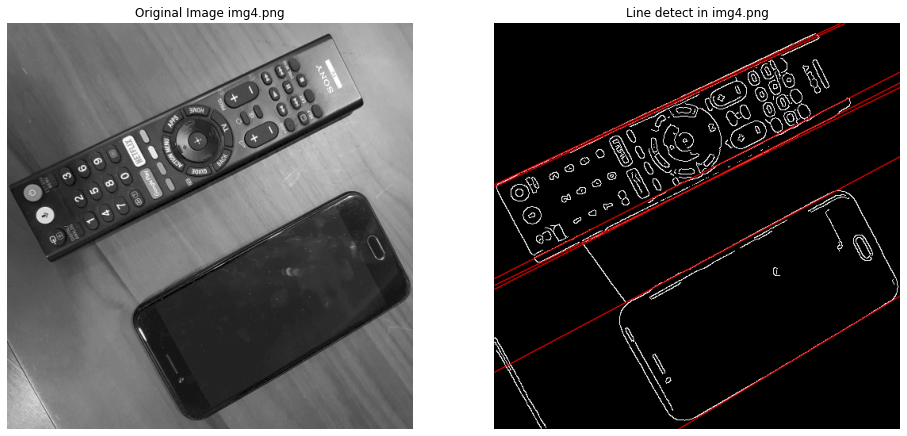

Goc giua hai vat the la 2.9166683605138655°


In [ ]:
import cv2
import sys
import math
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
def RemoveSinNoise(img):#Transfer parameters are Fourier transform spectrogram and filter size
    # calculate amplitude spectrum
    mag_spec = np.log(np.abs(img))
    h, w = mag_spec.shape[0:2]
    # img[int(h/2),224]=0
    # img[int(h/2),288]=0
    y=mag_spec[int(h/2)]
    # plt.plot(y)
    # plt.show()
    for i in range(len(y)-1):
      if y[i+1]/1.41 > y[i]:img[int(h/2),i+1]=0
    return img
def kmeanangle(arr):
    if len(arr) < 2 : print("Error")
    # Init clustering
    cluster1=[]
    cluster2=[]
    change = True
    for i in range(len(arr)) :
      if i%2==0:cluster1.append(arr[i])
      else: cluster2.append(arr[i])
    centroid1 = sum(cluster1)/len(cluster1)
    centroid2 = sum(cluster2)/len(cluster2)
    # Clustering
    while(change):
        change=False
        for i in cluster1:
          if abs(i-centroid1) >= abs(i-centroid2):
            cluster2.append(i)
            cluster1.remove(i)
            change=True
        for i in cluster2:
          if abs(i-centroid2) > abs(i-centroid1):
            cluster1.append(i)
            cluster2.remove(i)
            change=True
        # print(cluster1)
        # print(cluster2)
        centroid1 = sum(cluster1)/len(cluster1)
        centroid2 = sum(cluster2)/len(cluster2)   
    return centroid1, centroid2
def caculateangle(file):      
  gray = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
  # Fourier transform
  img_dft = np.fft.fft2(gray)
  dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle
  # h, w = dft_shift.shape[0:2]
  # y=dft_shift[int(h/2),250:260]
  # plt.plot(y)
  # plt.show()
  #filter
  dft_shift=RemoveSinNoise(dft_shift)
  # dft_shift=customLowPassFiltering(dft_shift,100,100)
  res = np.log(np.abs(dft_shift))

  # Inverse Fourier Transform
  idft_shift = np.fft.ifftshift(dft_shift)  #Move the frequency domain from the middle to the upper left corner
  ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
  ifimg = np.abs(ifimg)
  # blurimg=cv2.GaussianBlur(gray, (3, 3), 0)
  # cv2_imshow(blurimg)
  # cv2_imshow(gray)
  # cv2_imshow(np.uint8(ifimg))

  blurimg=cv2.GaussianBlur(np.uint8(ifimg), (7, 7), 0)
  # cv2_imshow(np.uint8(ifimg))
  dst = cv2.Canny(blurimg, 30, 90)  
  # Copy edges to the images that will display the results in BGR
  cdst = cv2.cvtColor(dst,cv2.COLOR_GRAY2RGB)
  lines = cv2.HoughLines(dst, 1, np.pi / 180, 160, None, 0, 0)
  angle=[]
  rh=[]
  if lines is not None:
      for i in range(0, len(lines)):
          rho = lines[i][0][0]
          theta = lines[i][0][1]
          angle.append(theta)
          rh.append(rho)
          a = math.cos(theta)
          b = math.sin(theta)
          x0 = a * rho
          y0 = b * rho
          pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
          pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
          cv2.line(cdst, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)
  # Draw 
  plt.figure(figsize=(16,9))
  plt.subplot(121), plt.imshow(gray, 'gray'), plt.title('Original Image '+file)
  plt.axis('off')
  plt.subplot(122), plt.imshow(cdst, 'gray'), plt.title('Line detect in '+file)
  plt.axis('off')
  plt.show() 
  # print(angle)
  angle1,angle2 = kmeanangle(angle)
  # print(angle1,angle2)
  print("Goc giua hai vat the la "+ str(abs(angle1-angle2)/np.pi*180)+"°" )
listimg=["img3_add.png","img3_bruit.png","img3_bruit2.png","img4.png"]
for image in listimg:
  caculateangle(image)